# Importing Libraries

In [1351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [1352]:
#heartdisease_data.csv
heartdiseases=pd.read_csv("heart.csv")
heartdiseases.head(10)

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [1353]:
heartdiseases['Trestbps'].value_counts

<bound method IndexOpsMixin.value_counts of 0      140
1      130
2      132
3      142
4      110
      ... 
195    127
196      ?
197    122
198      ?
199    120
Name: Trestbps, Length: 200, dtype: object>

cp=Cerebral Palsy

Trestbps=resting blood pressure

Chol=serum cholesterol

Fbs=fasting blood pressure

Restecg= resting electrocardiographic results;

Thalach=maximum heart rate achieved

Exang=exercise induced angina

Oldpeak=exercise relative to rest

Slope=the slope of the peak

CA=colored by flourosopy

Thal=thalassemia

Num=prediction of heart diseases

In [1354]:
heartdiseases.shape

(200, 14)

In [1355]:
heartdiseases.nunique()

Age          39
Sex           2
CP            4
Trestbps     41
Chol        100
Fbs           3
Restecg       3
Thalach      60
Exang         3
Oldpeak      15
Slope         4
CA            2
Thal          4
Num           5
dtype: int64

There are no columns where all the values are unique or constant values. So all the columns might be important

In [1356]:
heartdiseases.columns.to_series().groupby(heartdiseases.dtypes).groups

{int64: ['Age', 'Sex', 'CP', 'Restecg', 'Num'], object: ['Trestbps', 'Chol', 'Fbs', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal']}

In [1357]:
heartdiseases.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
Num         0
dtype: int64

In [1358]:
                        
for col in heartdiseases:
    print(heartdiseases[col].value_counts())                        

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
124     4
128     4
126     4
144     4
136     4
170     4
134     4
132     3
158     3
152     2
104     2
154     2
125     2
138     2
180     2
116     2
112     2
155     2
96      1
146     1
114     1
0       1
156     1
135     1
100     1
172     1
102     1
106     1
178     1
190     1
118     1
127     1
Name: Trestbps, dtype: int64
0      49
?       7
220     4
203     4
258     4
       ..
277     1
237     1
339  

Count the number of '?' values in each column:
    

    Trestbps : 56
           
    Chol : 7
        
    Fbs : 7
        
    Thalach : 53
        
    Exang : 53
        
    Oldpeak : 56
        
    Slope : 102
        
    CA : 198 ( This column has a lot of '?' values. so, this column will be deleted)
        
    Thal : 166
    
    
 Count the number of 0 values in each column:   
 
    Sex : 6 (Can be 0)
    
    Trestbps : 1 (Need to replace 0. Because Trestbps can not be 0)
           
    Chol : 49 (Need to replace 0. Because Chol can not be 0)
        
    Fbs : 125 ( Can be 0)
    
    Restecg : 80 (Can be 0)
        
    Thalach :  No 
        
    Exang : 52 (Can be 0)
        
    Oldpeak : 40 (Can be 0)
        
    Slope : No
        
    CA : 2 ( Here a lot of values are missing. So, it's better to delete the column)
        
    Thal : No
    
    Num : 51 ( Can be 0)
    
    Here, 0 values of these "Trestbps" and "chol" two columns need to be changed.

There are 200 rows in the dataset. There are 198 '?' values present in the 'CA' column which is large. So, let me delete this column. 

# Dropping unexpected column

In [1359]:
heartdiseases.drop(['CA','Thal'],axis=1,inplace=True)

In [1360]:
heartdiseases.describe()

,Age,Sex,CP,Restecg,Num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


<AxesSubplot:>

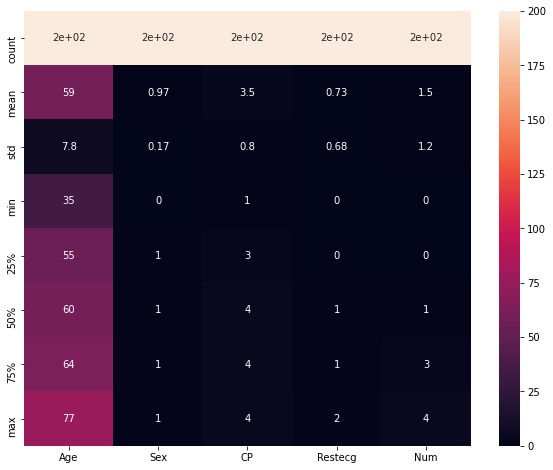

In [1361]:
plt.figure(figsize=(10,8))
sns.heatmap(heartdiseases.describe(),annot=True)

In the numeric variables we can observe that there are no huge differences between the 75 percentile and max. mean and 50 percentile don't have huge difference as well. So, it looks normal. Most probably there are no outliers.

# Fill the '?' values

In [1362]:
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [1363]:
heartdiseases['Trestbps'].value_counts()

?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
124     4
128     4
126     4
144     4
136     4
170     4
134     4
132     3
158     3
152     2
104     2
154     2
125     2
138     2
180     2
116     2
112     2
155     2
96      1
146     1
114     1
0       1
156     1
135     1
100     1
172     1
102     1
106     1
178     1
190     1
118     1
127     1
Name: Trestbps, dtype: int64

Firstly, Let me fill all the '?' values with NaN

In [1364]:
#heartdiseases['Ca'] = heartdiseases['CA'].replace(['?'],'NaN')
heartdiseases=heartdiseases.replace(['?'],np.nan)
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


Replace NaN with 0 in the 'Trestbps' and 'Chol' columns

In [1365]:
heartdiseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       200 non-null    int64 
 1   Sex       200 non-null    int64 
 2   CP        200 non-null    int64 
 3   Trestbps  144 non-null    object
 4   Chol      193 non-null    object
 5   Fbs       193 non-null    object
 6   Restecg   200 non-null    int64 
 7   Thalach   147 non-null    object
 8   Exang     147 non-null    object
 9   Oldpeak   144 non-null    object
 10  Slope     98 non-null     object
 11  Num       200 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 18.9+ KB


Here I have filled all the NaN values with string '0'

In [1366]:
heartdiseases["Chol"].fillna("0", inplace = True)

In [1367]:
heartdiseases["Trestbps"].fillna("0", inplace = True)

In [1368]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
0      57
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
170     4
134     4
136     4
128     4
126     4
144     4
124     4
132     3
158     3
152     2
104     2
154     2
125     2
138     2
155     2
180     2
116     2
112     2
146     1
114     1
96      1
156     1
135     1
100     1
172     1
102     1
106     1
190     1
178     1
118     1
127     1
Name: Trestbps, dtype: int64
0      56
258     4
220     4
203     4
218     3
       ..
245     1
272     1
207     1
306  

Here I have converted all the string '0' with value 0

In [1369]:
heartdiseases.columns

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Num'],
      dtype='object')

In [1370]:
heartdiseases["Chol"].replace('0',0,inplace=True)

In [1371]:
heartdiseases["Trestbps"].replace('0',0,inplace=True)

In [1372]:
cols = ['Age', 'Sex', 'CP','Fbs', 'Restecg','Thalach','Exang', 'Oldpeak', 'Slope', 'Thal', 'Num']
heartdiseases[cols].replace('0',0,inplace=True)

KeyError: "['Thal'] not in index"

In [1373]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
0      57
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
128     4
144     4
126     4
124     4
170     4
134     4
136     4
132     3
158     3
104     2
154     2
125     2
152     2
138     2
112     2
116     2
155     2
180     2
100     1
127     1
190     1
146     1
114     1
96      1
156     1
118     1
172     1
102     1
106     1
178     1
135     1
Name: Trestbps, dtype: int64
0      56
220     4
258     4
203     4
219     3
       ..
312     1
349     1
273     1
244  

First I have replaced all the 0 values with missing values 

In [1374]:
#heartdiseases['Chol'].replace(0, np.nan,inplace=True)

In [1375]:
#heartdiseases['Trestbps'].replace(0, np.nan,inplace=True)

Now , fill the 0 with mean value according to SEX column

In [1376]:
heartdiseases

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,1
196,62,1,1,0,139,0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,2
198,58,1,4,0,385,1,2,NaN,NaN,NaN,NaN,0


In [1377]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
0      57
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
128     4
144     4
126     4
124     4
170     4
134     4
136     4
132     3
158     3
104     2
154     2
125     2
152     2
138     2
112     2
116     2
155     2
180     2
100     1
127     1
190     1
146     1
114     1
96      1
156     1
118     1
172     1
102     1
106     1
178     1
135     1
Name: Trestbps, dtype: int64
0      56
220     4
258     4
203     4
219     3
       ..
312     1
349     1
273     1
244  

In [1378]:
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [1379]:
x = heartdiseases[heartdiseases['Trestbps']!=0]
x.mean()

Age          5.931469e+01
Sex          9.650350e-01
CP           3.615385e+00
Trestbps              inf
Restecg      7.272727e-01
Thalach               inf
Exang       7.070637e+139
Num          1.545455e+00
dtype: float64

In [1380]:
heartdiseases.dtypes

Age          int64
Sex          int64
CP           int64
Trestbps    object
Chol        object
Fbs         object
Restecg      int64
Thalach     object
Exang       object
Oldpeak     object
Slope       object
Num          int64
dtype: object

In [1381]:
#df1 = pd.DataFrame(heartdiseases.loc[heartdiseases['Trestbps']!= 0])
#df1.value_counts()

# Trestbps

In [1382]:
df=heartdiseases['Trestbps']
df.value_counts()
heartdiseases['Trestbps'].replace(0, np.nan,inplace=True) #Replace 0 to NaN values
df.dropna(axis=0, how='any',inplace=True) #Delete all the null values
df.value_counts()
np.asarray(df.iloc[:], dtype=np.float).mean() #Calculate the mean without 0

134.6993006993007

# Chol

In [1383]:
df2=heartdiseases['Chol']
df2.value_counts()
heartdiseases['Chol'].replace(0, np.nan,inplace=True)
df2.dropna(axis=0, how='any',inplace=True)
df2.value_counts()
np.asarray(df2.iloc[:], dtype=np.float).mean()

239.56944444444446

Now, I will replace the NaN values with 134.70 for 'Trestbps' column and 239.56 for 'Chol' column

# Replacing

In [1384]:
heartdiseases['Chol'].replace(0, np.nan,inplace=True)
heartdiseases['Trestbps'].replace(0, np.nan,inplace=True)

In [1385]:
values = {'Trestbps': 134.70, 'Chol': 239.56}
heartdiseases.fillna(value=values,inplace=True)

In [1386]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
134.7    57
120      16
130      15
140      10
150       9
110       9
160       8
122       6
142       5
136       4
128       4
144       4
170       4
124       4
134       4
126       4
158       3
132       3
104       2
155       2
180       2
112       2
125       2
154       2
152       2
116       2
138       2
156       1
135       1
114       1
178       1
100       1
118       1
106       1
102       1
172       1
96        1
146       1
190       1
127       1
Name: Trestbps, dtype: int64
239.56    56
20

Now, There are no NaN values in this two columns

In [1387]:
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [1388]:
heartdiseases.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps      0
Chol          0
Fbs           7
Restecg       0
Thalach      53
Exang        53
Oldpeak      56
Slope       102
Num           0
dtype: int64

# Thalach

In [1389]:
df3=heartdiseases['Thalach']
df3.value_counts()
#heartdiseases['Thalach'].replace(0, np.nan,inplace=True) #Replace 0 to NaN values
df3.dropna(axis=0, how='all',inplace=True) #Delete all the null values
df3.value_counts()
np.asarray(df3.iloc[:], dtype=np.float).mean() #Calculate the mean without 0

122.79591836734694

# Oldpeak

In [1390]:
df4=heartdiseases['Oldpeak']
df4.value_counts()
#heartdiseases['Thalach'].replace(0, np.nan,inplace=True) #Replace 0 to NaN values
df4.dropna(axis=0, how='all',inplace=True) #Delete all the null values
df4.value_counts()
np.asarray(df4.iloc[:], dtype=np.float).mean() #Calculate the mean without 0

1.3208333333333333

In [1391]:
values = {'Thalach': 59.35, 'Oldpeak': 1.32}
heartdiseases.fillna(value=values,inplace=True)

# Exang

In [1392]:
heartdiseases['Exang'].bfill(inplace=True)

# Slope

In [1393]:
heartdiseases['Slope'].ffill(inplace=True)

# Fbs

In [1394]:
heartdiseases['Fbs'].ffill(inplace=True)

In [1395]:
Now, There are no null values present in the dataset

SyntaxError: invalid syntax (<ipython-input-1395-6cadd2102023>, line 1)

In [1396]:
heartdiseases.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Num         0
dtype: int64

In [1397]:
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,2,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


# Convert Object type to float type

In [1398]:
heartdiseases = heartdiseases.astype(float) 
print(heartdiseases.dtypes)

Age         float64
Sex         float64
CP          float64
Trestbps    float64
Chol        float64
Fbs         float64
Restecg     float64
Thalach     float64
Exang       float64
Oldpeak     float64
Slope       float64
Num         float64
dtype: object


In [1399]:
heartdiseases.corr()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
Age,1.000000,0.034230,-0.038280,0.188938,0.045534,0.146367,0.002400,-0.090130,0.036005,0.157088,-0.028833,0.287289
Sex,0.034230,1.000000,0.038036,0.023567,-0.158355,-0.053290,0.060621,-0.033425,-0.007963,0.097250,0.034358,0.147470
CP,-0.038280,0.038036,1.000000,0.054088,0.118327,-0.037586,0.034790,0.117993,0.235058,0.040268,0.033229,0.168210
Trestbps,0.188938,0.023567,0.054088,1.000000,0.016286,0.177974,0.061943,0.032543,0.162666,0.144378,-0.016837,0.217509
Chol,0.045534,-0.158355,0.118327,0.016286,1.000000,0.137812,-0.039420,-0.035088,0.082044,-0.002358,0.029816,0.105733
Fbs,0.146367,-0.053290,-0.037586,0.177974,0.137812,1.000000,0.165761,-0.020274,-0.126542,-0.075989,0.034704,0.052228
Restecg,0.002400,0.060621,0.034790,0.061943,-0.039420,0.165761,1.000000,-0.021340,-0.027818,-0.107010,-0.038687,-0.032800
Thalach,-0.090130,-0.033425,0.117993,0.032543,-0.035088,-0.020274,-0.021340,1.000000,-0.032188,0.096167,-0.025358,0.029877
Exang,0.036005,-0.007963,0.235058,0.162666,0.082044,-0.126542,-0.027818,-0.032188,1.000000,0.265218,0.161270,0.248429
Oldpeak,0.157088,0.097250,0.040268,0.144378,-0.002358,-0.075989,-0.107010,0.096167,0.265218,1.000000,0.173643,0.378257


Correlation with the target variable : 

Age----0.287289 ( Positive and average correlation comparing others)

Sex----0.287289  (Positive and average correlation comparing others)

CP----0.168210   (Positive and average correlation comparing others)

Trestbps----0.217509  (Positive and average correlation comparing others)

Chol----0.105733  (Positive and average correlation comparing others)

Fbs----0.052228  (Positive but less correlation comparing others)

Restecg-----  -0.032800 (Negative and less correlation comparing others)

Thalach----0.287289 (Positive and average correlation comparing others)

Exang----0.248429  (Positive and average correlation comparing others)

Oldpeak----0.378257  (Positive and average correlation comparing others)

Slope----0.025698  (Positive but less correlation comparing others)


<AxesSubplot:>

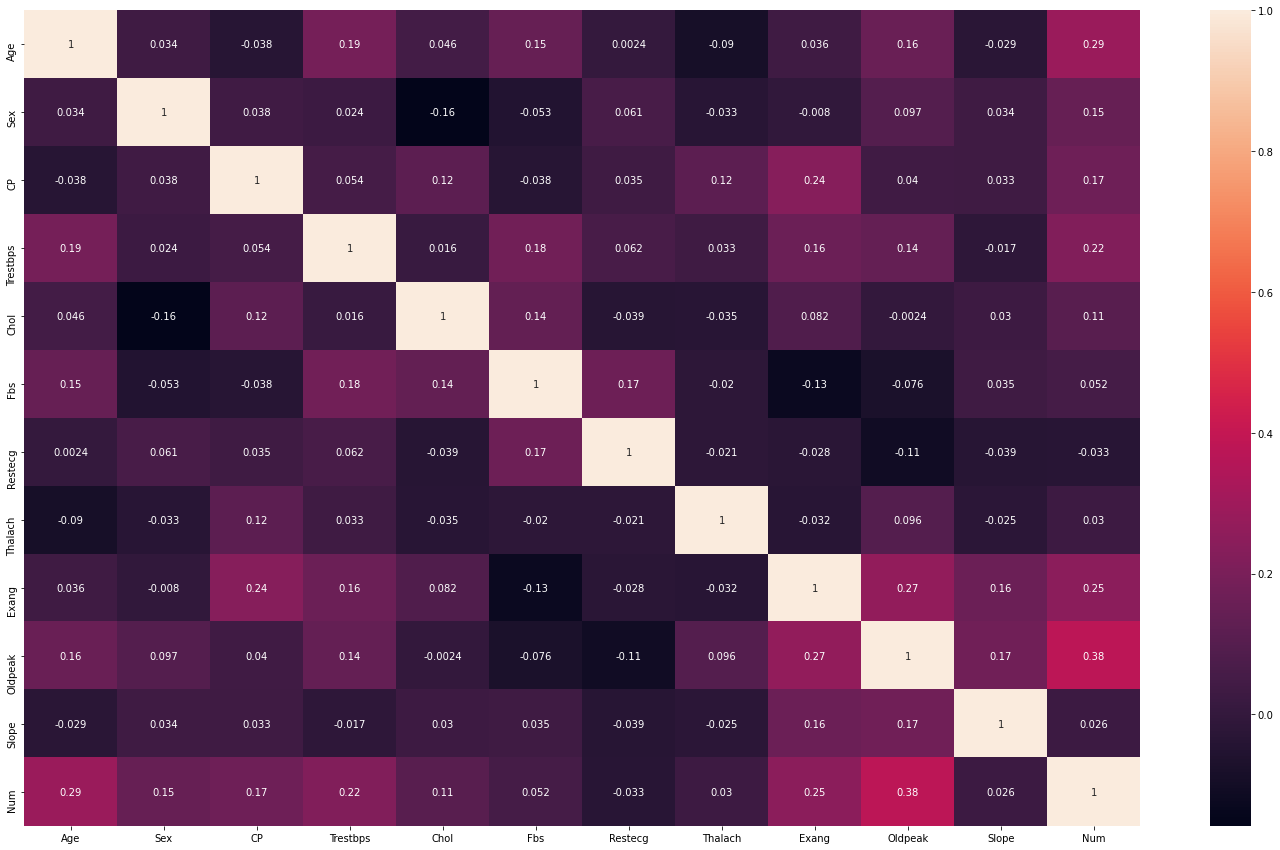

In [1400]:
plt.subplots(figsize=(25,15))
sns.heatmap(heartdiseases.corr(),annot=True)

I am getting the same result as before

In [1401]:
heartdiseases.describe()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,59.350000,0.970000,3.505000,134.699500,239.566800,0.355000,0.735000,105.982750,0.645000,1.320600,2.12500,1.520000
std,7.811697,0.171015,0.795701,15.581859,44.748954,0.479714,0.683455,33.804844,0.479714,0.937755,0.64143,1.219441
min,35.000000,0.000000,1.000000,96.000000,100.000000,0.000000,0.000000,59.350000,0.000000,-0.500000,1.00000,0.000000
25%,55.000000,1.000000,3.000000,126.000000,217.000000,0.000000,0.000000,59.350000,0.000000,1.000000,2.00000,0.000000
50%,60.000000,1.000000,4.000000,134.700000,239.560000,0.000000,1.000000,111.500000,1.000000,1.320000,2.00000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,3.00000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.00000,4.000000


Observations : 
    
    1. In the 'Chol' column there are huge difference between 75 percentile and the max value. There might have outliers. But Other columns are ok.
    
    2. In all the columns mean and 50 percentile are nearly which represent the normal data.

<AxesSubplot:>

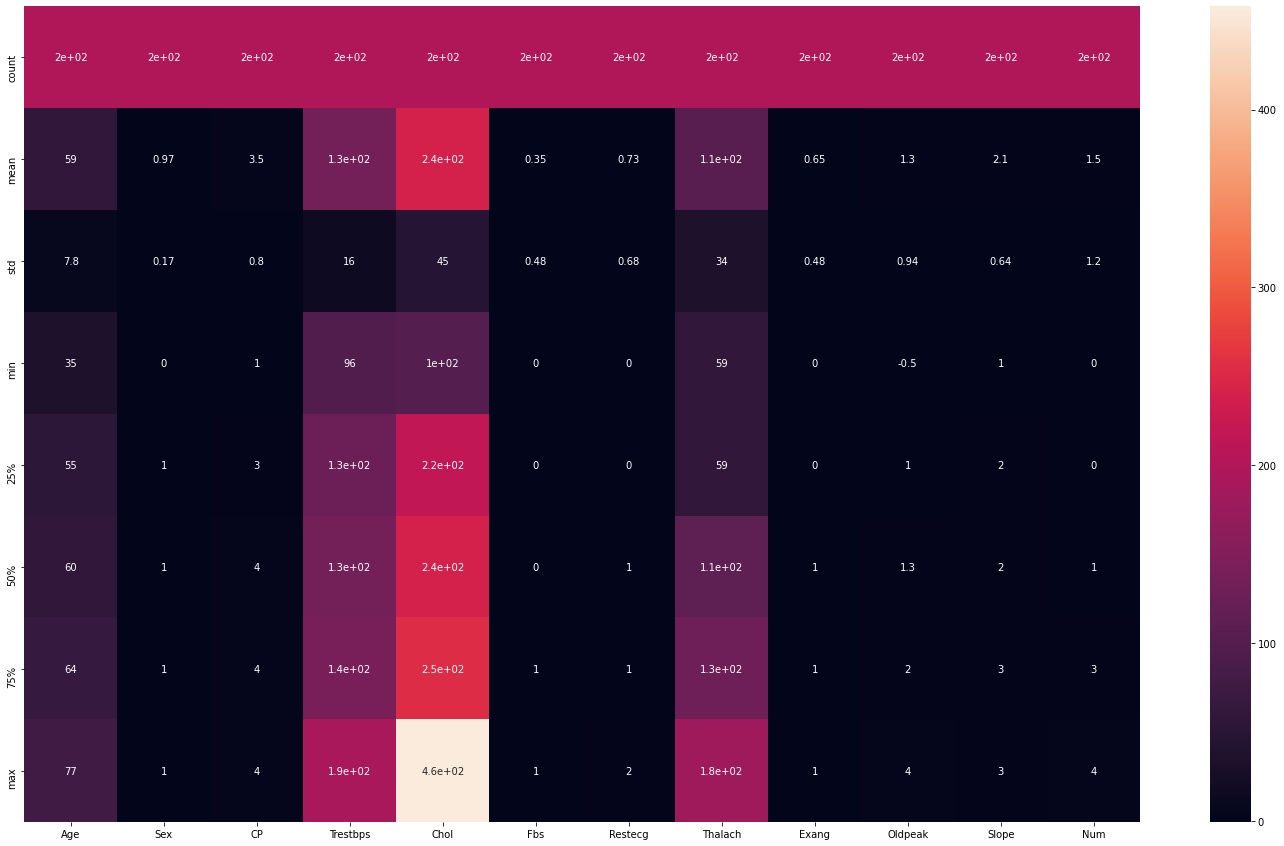

In [1402]:
plt.subplots(figsize=(25,15))
sns.heatmap(heartdiseases.describe(),annot=True)

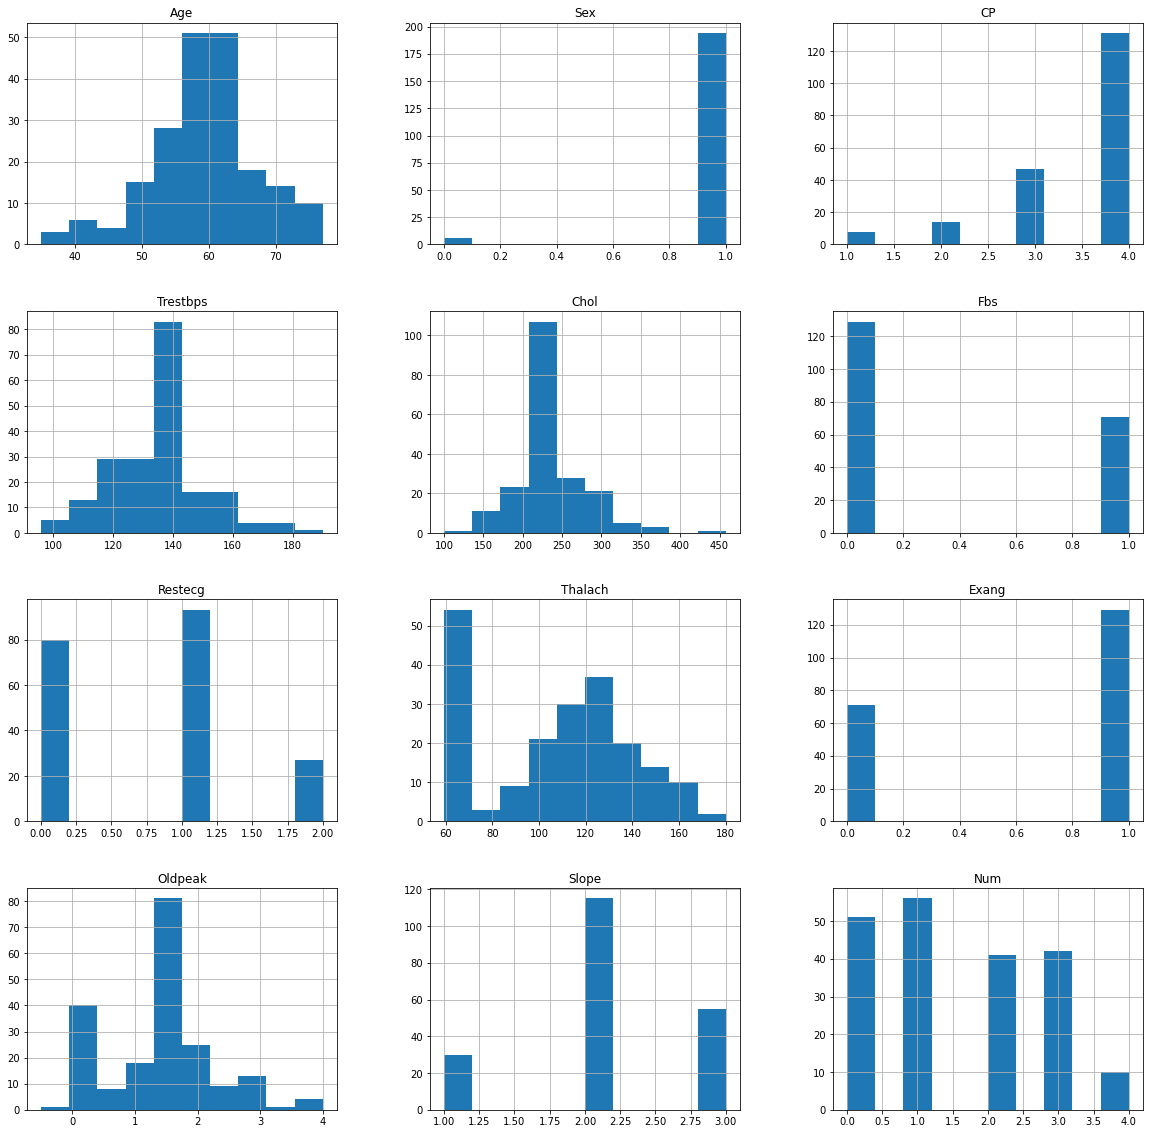

In [1403]:
heartdiseases.hist(figsize=(20,20))
plt.show()

The above histogram is showing how each attribute is distributed within the dataset. For some of the attributes you can sort of see the beginning of outliers forming in blood pressure, cholesterol, and old peak. In these columns the peak are too high than others what represent there are outliers. Also it is showing that all the columns are not normally distributed.

# Target Variable and Age 

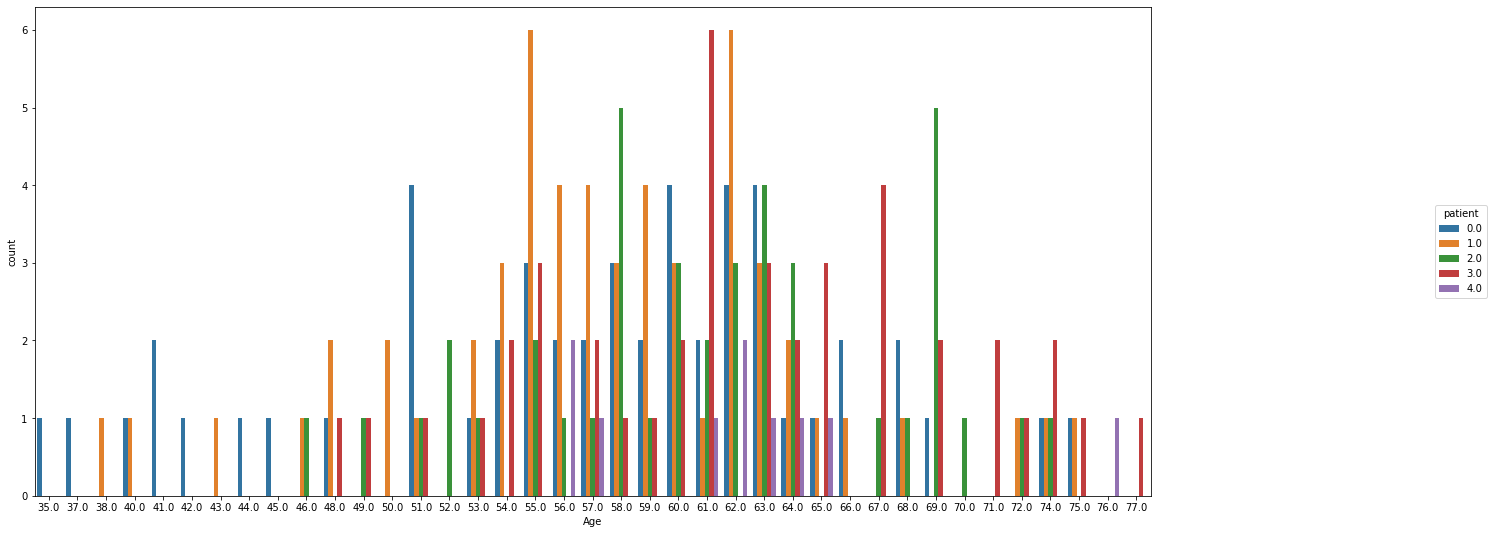

In [1404]:
plt.figure(figsize=(20,9))
#plt.legend(loc='upper left')

g = sns.countplot(data = heartdiseases, x = 'Age', hue = 'Num')
g.legend(title = 'patient', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

It's showing that the age from 52 to 66 heart disease has been clustered

# Target Variable and sex

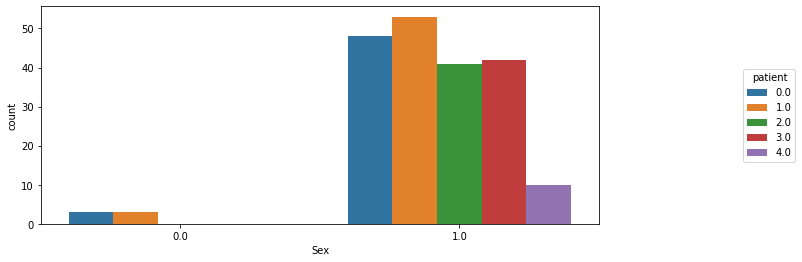

In [1405]:
plt.figure(figsize=(10,4))
#plt.legend(loc='upper left')

g = sns.countplot(data = heartdiseases, x = 'Sex', hue = 'Num')
g.legend(title = 'patient', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Here, 1 is male and 0 is Female. Male has higher rate of heart disease

# Chi-square test

In [1406]:
import scipy.stats
chi = pd.crosstab(heartdiseases["Sex"],heartdiseases["Num"])
scipy.stats.chi2_contingency(chi)

(5.401542060123019,
 0.2485205239227052,
 4,
 array([[ 1.53,  1.68,  1.23,  1.26,  0.3 ],
        [49.47, 54.32, 39.77, 40.74,  9.7 ]]))

Here, the P-value>0.05. So, we can accept the null hypothesis.

# chest pain and heart disease

In [1407]:
chi2 = pd.crosstab(heartdiseases["CP"],heartdiseases["Num"])
scipy.stats.chi2_contingency(chi2)

(23.882859197268516,
 0.021100132709511794,
 12,
 array([[ 2.04 ,  2.24 ,  1.64 ,  1.68 ,  0.4  ],
        [ 3.57 ,  3.92 ,  2.87 ,  2.94 ,  0.7  ],
        [11.985, 13.16 ,  9.635,  9.87 ,  2.35 ],
        [33.405, 36.68 , 26.855, 27.51 ,  6.55 ]]))

Here The p_value<0.05. We can reject the null hypothesis.

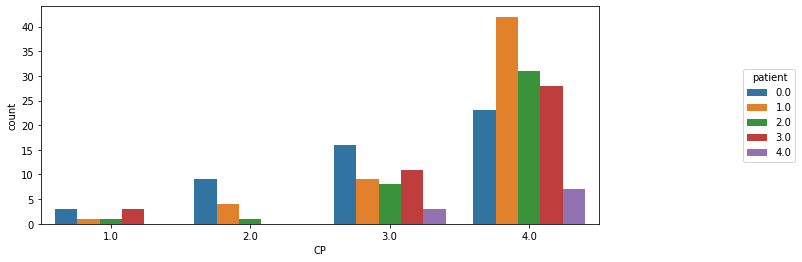

In [1408]:
plt.figure(figsize=(10,4))
#plt.legend(loc='upper left')

g = sns.countplot(data = heartdiseases, x = 'CP', hue = 'Num')
g.legend(title = 'patient', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# cholesterol and heart disease

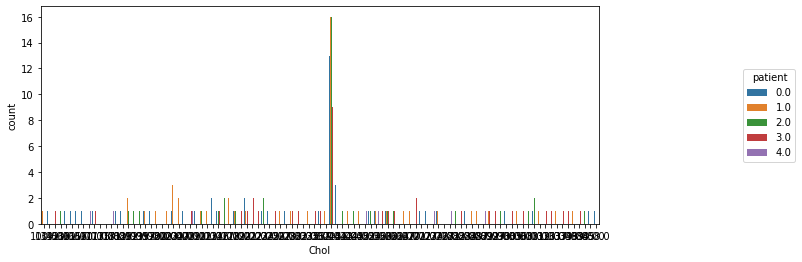

In [1409]:
plt.figure(figsize=(10,4))
#plt.legend(loc='upper left')

g = sns.countplot(data = heartdiseases, x = 'Chol', hue = 'Num')
g.legend(title = 'patient', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [1410]:
heartdiseases.columns

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Num'],
      dtype='object')

# Fbs and heart disease

array([[<AxesSubplot:xlabel='Fbs', ylabel='Num'>,
        <AxesSubplot:xlabel='Fbs', ylabel='Num'>,
        <AxesSubplot:xlabel='Fbs', ylabel='Num'>],
       [<AxesSubplot:xlabel='Fbs', ylabel='Num'>,
        <AxesSubplot:xlabel='Fbs', ylabel='Num'>,
        <AxesSubplot:xlabel='Fbs', ylabel='Num'>],
       [<AxesSubplot:xlabel='Fbs', ylabel='Num'>,
        <AxesSubplot:xlabel='Fbs', ylabel='Num'>,
        <AxesSubplot:xlabel='Fbs', ylabel='Num'>]], dtype=object)

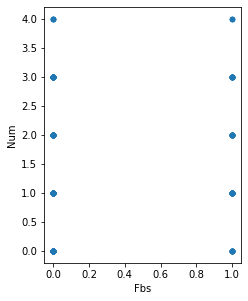

In [1411]:
heartdiseases.plot(kind='scatter',x="Fbs",y="Num",subplots=True,layout=(3,3),figsize=(12,16))

# Checling Outliers

Age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
CP          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
Exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Slope          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Num            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

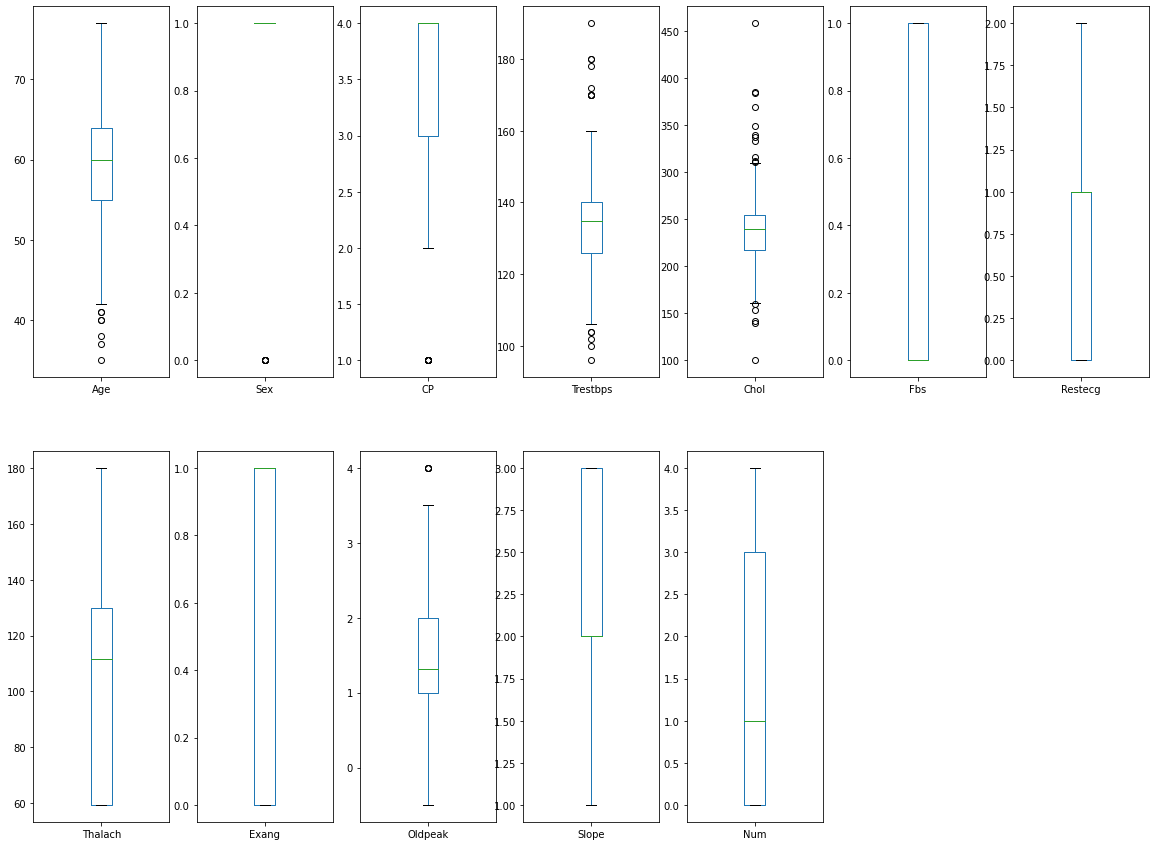

In [1412]:
heartdiseases.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,7),figsize=(20,15))

Outliers are present in "Age","Sex","CP","Trestbps","Chol ","Oldpeak" columns

In [1413]:
heartdiseases.corr()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
Age,1.000000,0.034230,-0.038280,0.188938,0.045534,0.146367,0.002400,-0.090130,0.036005,0.157088,-0.028833,0.287289
Sex,0.034230,1.000000,0.038036,0.023567,-0.158355,-0.053290,0.060621,-0.033425,-0.007963,0.097250,0.034358,0.147470
CP,-0.038280,0.038036,1.000000,0.054088,0.118327,-0.037586,0.034790,0.117993,0.235058,0.040268,0.033229,0.168210
Trestbps,0.188938,0.023567,0.054088,1.000000,0.016286,0.177974,0.061943,0.032543,0.162666,0.144378,-0.016837,0.217509
Chol,0.045534,-0.158355,0.118327,0.016286,1.000000,0.137812,-0.039420,-0.035088,0.082044,-0.002358,0.029816,0.105733
Fbs,0.146367,-0.053290,-0.037586,0.177974,0.137812,1.000000,0.165761,-0.020274,-0.126542,-0.075989,0.034704,0.052228
Restecg,0.002400,0.060621,0.034790,0.061943,-0.039420,0.165761,1.000000,-0.021340,-0.027818,-0.107010,-0.038687,-0.032800
Thalach,-0.090130,-0.033425,0.117993,0.032543,-0.035088,-0.020274,-0.021340,1.000000,-0.032188,0.096167,-0.025358,0.029877
Exang,0.036005,-0.007963,0.235058,0.162666,0.082044,-0.126542,-0.027818,-0.032188,1.000000,0.265218,0.161270,0.248429
Oldpeak,0.157088,0.097250,0.040268,0.144378,-0.002358,-0.075989,-0.107010,0.096167,0.265218,1.000000,0.173643,0.378257


There are good correlation with those columns. So, it's not possible to delete those columns

# Check Skewness

In [1414]:
heartdiseases.shape

(200, 12)

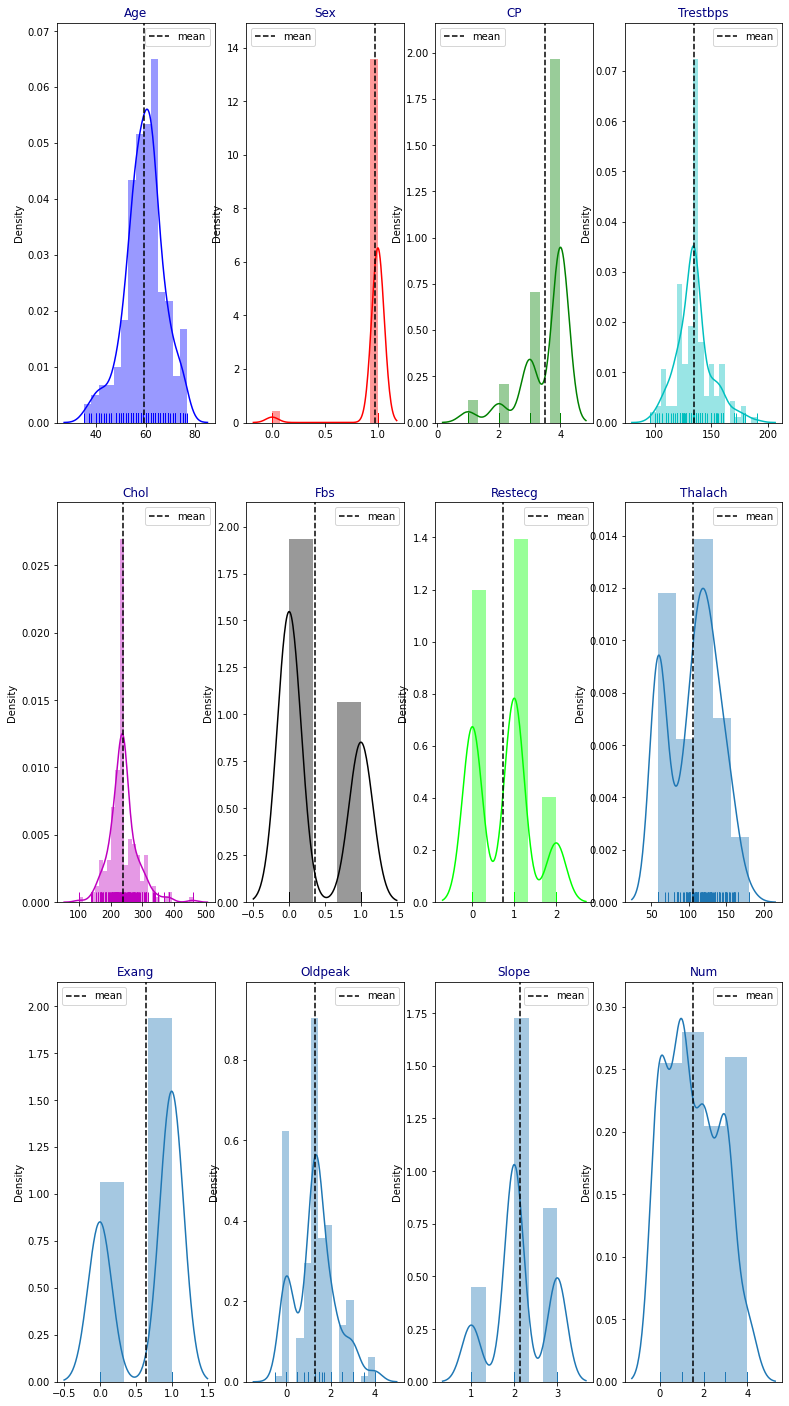

In [1415]:
import itertools
cols=['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach','Exang', 'Oldpeak', 'Slope', 'Num']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,4,j+1)
    ax=sns.distplot(heartdiseases[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(heartdiseases[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In some colums peak are too high. In the columns CP there are left skewness present 

# Removing outliers

# Z-Score

In [1416]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(heartdiseases))
threshold=3
new_heart=heartdiseases[(z<3).all(axis=1)]

In [1417]:
new_heart.shape

(180, 12)

In [1418]:
heartdiseases.shape

(200, 12)

Age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
CP          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
Exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Slope          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Num            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

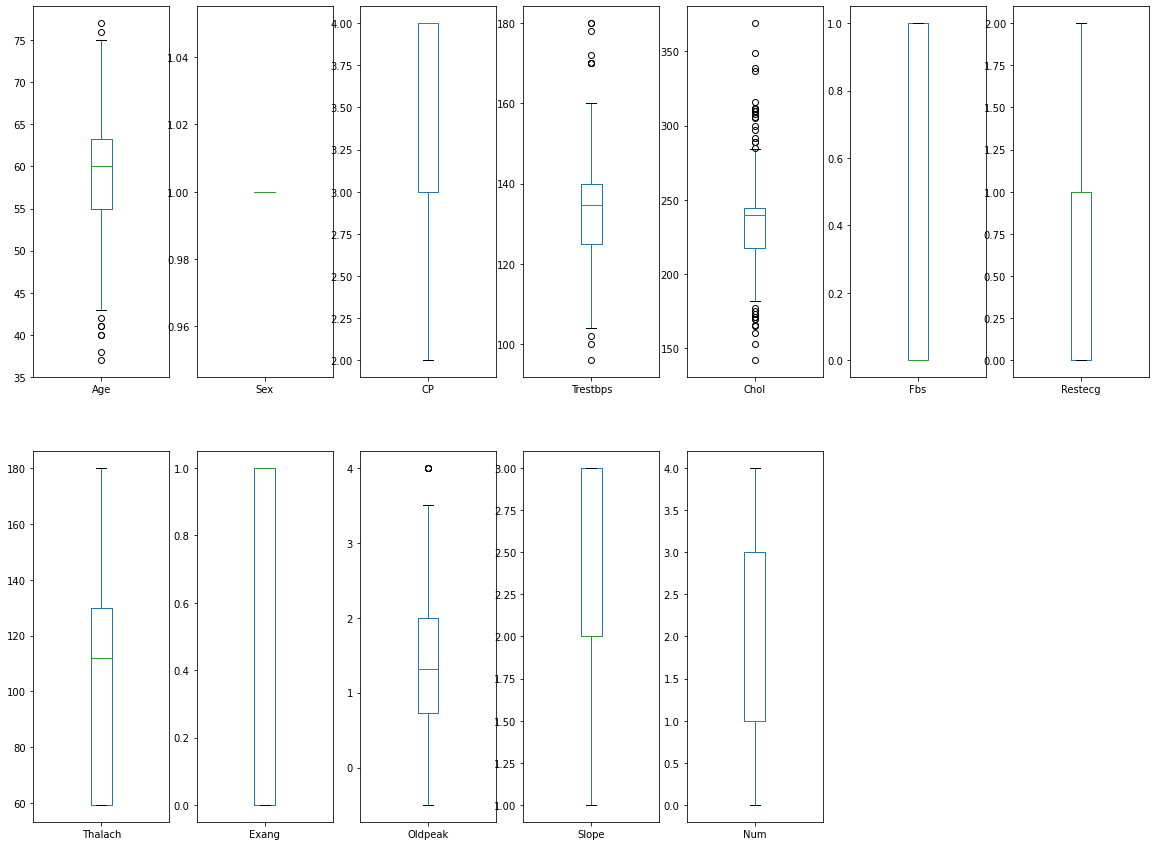

In [1419]:
new_heart.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,7),figsize=(20,15))

# Data Loose

In [1420]:
data_loose=(20/200)*100
print(data_loose)

10.0


Here, I am loosing 10% data

# IQR

In [1421]:
q1=heartdiseases.quantile(0.25)
q3=heartdiseases.quantile(0.75)
IQR=q3-q1
print(IQR)

Age          9.00
Sex          0.00
CP           1.00
Trestbps    14.00
Chol        37.50
Fbs          1.00
Restecg      1.00
Thalach     70.65
Exang        1.00
Oldpeak      1.00
Slope        1.00
Num          3.00
dtype: float64


In [1422]:
heart_new1=heartdiseases[~((heartdiseases<(q1-1.5*IQR))|(heartdiseases>(q3+1.5*IQR))).any(axis=1)]
print(heart_new1.shape)

(148, 12)


In [1423]:
data_loose=(52/200)*100
print(data_loose)

26.0


Here, I am loosing 26% data. So, I am accepting the z-score

In [1425]:
new_heart.describe()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
count,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,59.333333,1.0,3.611111,134.488889,237.245778,0.333333,0.738889,106.539444,0.655556,1.325333,2.127778,1.566667
std,7.769731,0.0,0.610787,15.528399,37.207933,0.472719,0.679828,33.462800,0.476512,0.959177,0.634489,1.205666
min,37.000000,1.0,2.000000,96.000000,142.000000,0.000000,0.000000,59.350000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.0,3.000000,125.000000,217.750000,0.000000,0.000000,59.350000,0.000000,0.725000,2.000000,1.000000
50%,60.000000,1.0,4.000000,134.700000,239.560000,0.000000,1.000000,112.000000,1.000000,1.320000,2.000000,1.000000
75%,63.250000,1.0,4.000000,140.000000,244.250000,1.000000,1.000000,130.000000,1.000000,2.000000,3.000000,3.000000
max,77.000000,1.0,4.000000,180.000000,369.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


In [1426]:
new_heart.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,0.0


# Convert

In [1430]:
new_heart.columns

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Num'],
      dtype='object')

# Dummies

In [1431]:
cols = ['Age','Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach','Exang','Slope', 'Num']
for col in cols:
   new_heart[col] = new_heart[col].apply(lambda x: int(x) if x == x else "")

In [1432]:
new_heart = pd.get_dummies(new_heart[['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach','Exang', 'Oldpeak', 'Slope', 'Num']])

In [1433]:
new_heart.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3.0,2,2
1,44,1,4,130,209,0,1,127,0,0.0,2,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


# Preparing the dataset for training and testing model

In [1465]:
#Prepare the dataset for training the model
X=new_heart.drop('Num',axis=1)
Y=new_heart['Num']

In [1467]:
X.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope
0,63,1,4,140,260,0,1,112,1,3.0,2
1,44,1,4,130,209,0,1,127,0,0.0,2
2,60,1,4,132,218,0,1,140,1,1.5,3
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,2


In [1468]:
new_heart.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3.0,2,2
1,44,1,4,130,209,0,1,127,0,0.0,2,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


There are difference of range among some columns. Such as Age has max value 77,Sex has 1. Again Chol has 369.So,let me use scaling technique.

# Removing Skewness

# Yeo Jonson Method

In [1470]:
from sklearn.preprocessing import power_transform     #box-cox is only for positive but yeo-johnson is for both negative and positive
X=power_transform(X,method='yeo-johnson')

# Scaling

In [1474]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X)) 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.443190,0.0,0.686804,0.431243,0.660999,-0.707107,0.525330,0.164727,0.724861,1.607681,-0.216209
1,-1.865561,0.0,0.686804,-0.216609,-0.738012,-0.707107,0.525330,0.613025,-1.379575,-1.508166,-0.216209
2,0.040517,0.0,0.686804,-0.082357,-0.472647,-0.707107,0.525330,1.001825,0.724861,0.268801,1.393622
3,-0.599409,0.0,0.686804,0.554155,-0.187866,-0.707107,0.525330,1.271130,0.724861,1.190383,-1.753290
4,0.859669,0.0,-1.365178,-1.712503,-0.618968,1.414214,1.584525,-0.223490,0.724861,0.066324,-0.216209


# Model Creating

In [1501]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=99)

# Different Algorithms in one function

In [1502]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

In [1504]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),XGBClassifier(),LinearDiscriminantAnalysis(),AdaBoostClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    print("\033[1m" + 'Accuracy score of' + "\033[0m",m,"is: ")
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    print("f1_score: ",f1_score(Y_test,predm,average='micro'))
    print('\n')
    

Accuracy score of LogisticRegression() is: 
0.3055555555555556
[[5 2 1 0 0]
 [6 3 3 1 0]
 [2 1 1 3 0]
 [1 1 0 2 0]
 [1 0 1 2 0]]
              precision    recall  f1-score   support

           0       0.33      0.62      0.43         8
           1       0.43      0.23      0.30        13
           2       0.17      0.14      0.15         7
           3       0.25      0.50      0.33         4
           4       0.00      0.00      0.00         4

    accuracy                           0.31        36
   macro avg       0.24      0.30      0.24        36
weighted avg       0.29      0.31      0.27        36

f1_score:  0.3055555555555556


Accuracy score of GaussianNB() is: 
0.2777777777777778
[[5 2 1 0 0]
 [5 3 4 1 0]
 [2 0 1 4 0]
 [1 1 1 1 0]
 [0 0 1 3 0]]
              precision    recall  f1-score   support

           0       0.38      0.62      0.48         8
           1       0.50      0.23      0.32        13
           2       0.12      0.14      0.13         7
           3

# Random Forest

In [1463]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    Y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
Y_pred_rf = rf.predict(x_test)

In [1464]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 41.67 %


# Logistic Regression

In [1477]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [1478]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 30.56 %


# Naive Bayes

In [1479]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [1480]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 27.78 %


# SVM

In [1481]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [1482]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 22.22 %


# K Nearest Neighbors

In [1483]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [1484]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 30.56 %


# Decision Tree

In [1485]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [1486]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 27.78 %


# Random Forest

In [1487]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [1488]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 41.67 %


# XGBoost

In [1489]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[16:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1490]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 19.44 %


Here, I have got the best accuracy score using Random Forest algorithm

# MOdel Saving

In [1496]:
import pickle
filename='heart.pkl'
pickle.dump(rf,open(filename,'wb'))

In [ ]:
import pickle

In [1497]:
with open('heart.pkl','rb') as f:
    x=pickle.load(f)

# Conclusion:

In [1498]:
import numpy as np
a=np.array(Y_test)
a

array([1, 2, 4, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 4, 1, 0, 4, 2, 2,
       1, 4, 3, 1, 0, 0, 3, 1, 3, 2, 1, 0, 3, 0], dtype=int64)

In [1499]:
predicted=np.array(lr.predict(X_test))
predicted

array([2, 3, 3, 1, 1, 3, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 0, 2, 0, 3, 3, 2,
       0, 2, 3, 0, 2, 0, 3, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [1500]:
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,1,2
1,2,3
2,4,3
3,1,1
4,0,1
5,2,3
6,1,0
7,1,0
8,0,0
9,1,1
